In [2]:
%matplotlib inline
import openml as oml
import seaborn as sns
import numpy as np
import pandas as pd
import sys
from scipy.stats import norm
from matplotlib import pyplot
from openml import evaluations

benchmark_suite = oml.study.get_study('OpenML-CC18','tasks') # obtain the benchmark suite

In [3]:
# Download and group the evaluation data
scores = []
for task_id in benchmark_suite.tasks: # iterate over all tasks. Can be removed if list_evaluations used paging!
    evaluations = oml.evaluations.list_evaluations(task=[task_id], function='area_under_roc_curve', size=1000)
    for id, e in evaluations.items():
        scores.append({"dataset":e.data_name, "score":e.value})

In [6]:
median_scores = pd.DataFrame(scores).groupby(['dataset']).median().sort_values('score')
median_scores

,score
dataset,
car,0.500000
climate-model-simulation-crashes,0.500000
churn,0.514818
numerai28.6,0.520248
cylinder-bands,0.522689
analcatdata_dmft,0.532562
madelon,0.542308
dresses-sales,0.553424
cmc,0.654126


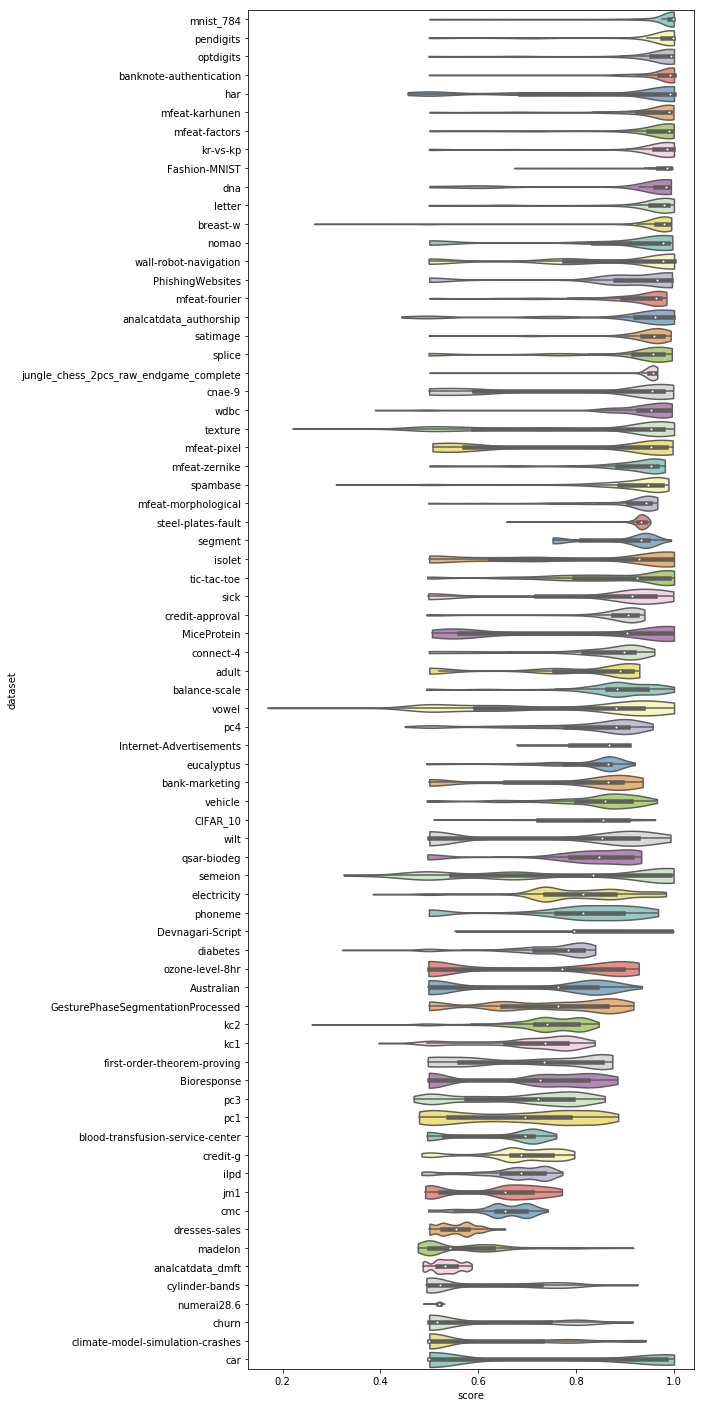

In [7]:
# plot the scores
sorted_score = sorted(scores, key=lambda x: -median_scores['score'][x["dataset"]])
fig, ax = pyplot.subplots(figsize=(8, 25))  
sns.violinplot(ax=ax, x="score", y="dataset", data=pd.DataFrame(sorted_score), scale="count", palette="Set3", cut=0);

In [ ]:
from tqdm import tqdm, tqdm_notebook

tasks = []
all_scores = []

for count, task_id in enumerate(tqdm_notebook(benchmark_suite.tasks)): # iterate over all tasks to fetch their evaluations
    #print("Fetching evaluations for task ",task_id,"-",count,"%")
    try:
        evaluations = oml.evaluations.list_evaluations(task=[task_id], uploader=[2702], function='area_under_roc_curve')
        for id, e in evaluations.items():
            tasks.append(e.data_name)
            all_scores.append(e.value)
    except oml.exceptions.OpenMLServerException as e: # to be sure that no server/network issues occurred
        print("OpenML error:", str(e),"for task",task_id)

In [15]:
# Create dataframe and sort by median over individual tasks
df = pd.DataFrame(dict(x=all_scores, g=tasks))
df['g'] = pd.Categorical(df['g'], df.groupby(['g']).median().sort_values('x').index.tolist())
df.sort_values('g');

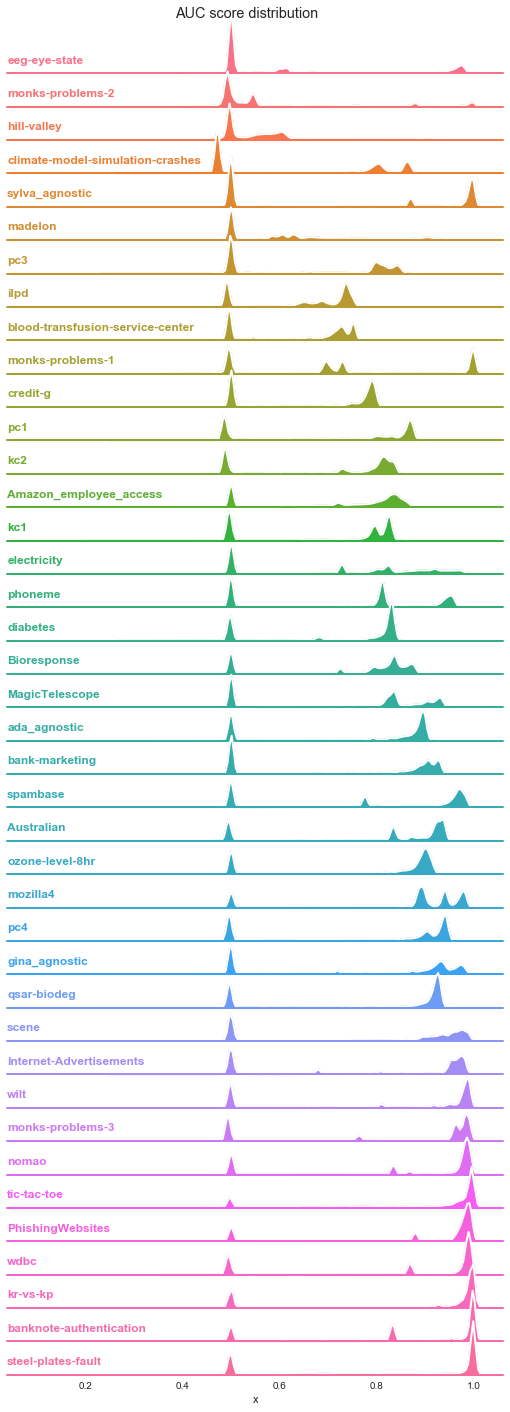

In [16]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, size=.5)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.005)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.005)
g.map(pyplot.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = pyplot.gca()
    ax.text(0, .2, label, fontweight="bold", color=color, 
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.5)

# Remove axes details that don't play will with overlap
g.set(yticks=[])
g.set_titles("")
g.fig.suptitle('AUC score distribution')
g.fig.subplots_adjust(top=.98)
g.despine(bottom=True, left=True);